# Prática: Regressão linear simples e multipla com Python

In [1]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
# carregando dados
df = pd.read_csv('../datasets/mt_cars.csv', encoding='utf-8')
df.head(),df.shape

(          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
 0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
 1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
 2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
 3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
 4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
 
    carb  
 0     4  
 1     4  
 2     1  
 3     1  
 4     2  ,
 (32, 12))

In [4]:
# removendo coluna unnamed
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [24]:
# separando variaveis
X = df.iloc[:,2].values
X1 = df.iloc[:, 1:4].values
y = df.iloc[:,0].values

In [8]:
# correlacao
np.corrcoef(X,y)

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [9]:
# pre processamento
X = X.reshape(-1,1) # formato de matriz para modelo

In [10]:
# modelo regressao simples com sklearn
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

In [11]:
# interceptação e inclinação
modelo.intercept_, modelo.coef_

(29.59985475616395, array([-0.04121512]))

In [12]:
# R^2 score
modelo.score(X,y)

0.7183433404897299

In [13]:
# previsoes
y_pred = modelo.predict(X)
y_pred

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

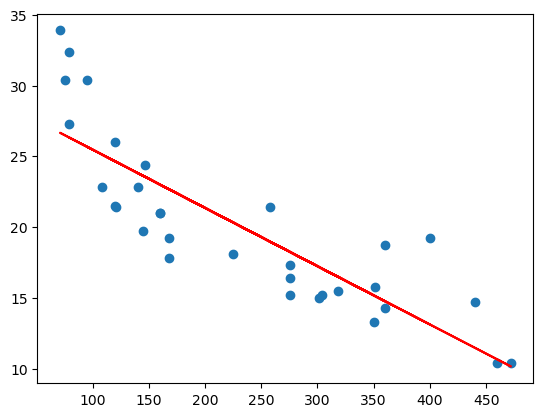

In [16]:
# plot
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

In [23]:
# previsao de um valor
modelo.predict([[200]])

array([21.35683076])

In [22]:
# modelo regressao simples com stats models
modelo_stats = sm.ols(formula='mpg ~ disp', data=df)
modelo_ajustado = modelo_stats.fit()
modelo_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           9.38e-10
Time:                        07:06:01   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# modelo regressao multipla sklearn
modelo2 = LinearRegression()
modelo2.fit(X1,y)

LinearRegression()

In [29]:
# inteceptacao e inclinacao
modelo2.intercept_, modelo2.coef_

(34.184919167520995, array([-1.22741994, -0.01883809, -0.01467933]))

In [26]:
# R²
modelo2.score(X1,y)

0.7678877440928638

In [30]:
# previsoes
y_pred2 = modelo2.predict(X1)
y_pred2

array([22.19157905, 22.19157905, 25.87554806, 20.34544669, 15.01496535,
       21.04050018, 13.9874119 , 25.60157354, 25.22830019, 21.85757825,
       21.85757825, 16.52773545, 16.52773545, 16.52773545, 12.46471975,
       12.54398342, 12.7005551 , 26.823846  , 27.08587094, 26.98169478,
       25.58888988, 16.1731483 , 16.4368815 , 14.17579276, 14.26144194,
       26.81819457, 25.67319828, 25.82497266, 13.87804731, 21.51999356,
       13.77771879, 25.39578359])

In [36]:
# previsoes com o modelo
modelo2.predict([[4,200,100]])

array([24.03968887])

In [38]:
# modelo regressao multipla com statsmodels
modelo_stats2 = sm.ols(formula='mpg ~ cyl + disp + hp', data=df)
modelo_ajustado2 = modelo_stats2.fit()
modelo_ajustado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           5.05e-09
Time:                        07:18:11   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## EXPLICAÇÃO

Realizamos uma análise de regressão linear simples e múltipla utilizando a biblioteca `scikit-learn` e `statsmodels` em Python,vamos revisar o código, explicar as etapas:

### Importação de Bibliotecas

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
```

As bibliotecas importadas são:

* `pandas` para manipulação de dados
* `numpy` para operações numéricas
* `matplotlib` para visualização de dados
* `scikit-learn` para modelo de regressão linear
* `statsmodels` para modelo de regressão linear com fórmula

### Carregamento de Dados

```python
df = pd.read_csv('../datasets/mt_cars.csv', encoding='utf-8')
df.head(), df.shape
```

Os dados são carregados a partir de um arquivo CSV localizado em `../datasets/mt_cars.csv`. O `head()` é utilizado para visualizar as primeiras linhas do conjunto de dados, e o `shape` é utilizado para visualizar o número de linhas e colunas do conjunto de dados.

### Remoção de Coluna Desnecessária

```python
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)
```

Uma coluna desnecessária (`Unnamed: 0`) é removida do conjunto de dados.

### Separação de Variáveis

```python
X = df.iloc[:, 2].values
X1 = df.iloc[:, 1:4].values
y = df.iloc[:, 0].values
```

As variáveis são separadas em:

* `X`: variável independente (disp)
* `X1`: variáveis independentes (cyl, disp, hp)
* `y`: variável dependente (mpg)

### Correlação

```python
np.corrcoef(X, y)
```

A correlação entre a variável independente (`X`) e a variável dependente (`y`) é calculada.

### Pré-Processamento

```python
X = X.reshape(-1, 1)  # formato de matriz para modelo
```

A variável independente (`X`) é transformada em uma matriz para ser utilizada no modelo de regressão.

### Modelo de Regressão Linear Simples com Scikit-Learn

```python
modelo = LinearRegression()
modelo.fit(X, y)
```

Um modelo de regressão linear simples é criado e ajustado utilizando a biblioteca `scikit-learn`.

### Interceptação e Inclinação

```python
modelo.intercept_, modelo.coef_
```

Os parâmetros do modelo (interceptação e inclinação) são visualizados.

### R² Score

```python
modelo.score(X, y)
```

O R² score do modelo é calculado.

### Previsões

```python
y_pred = modelo.predict(X)
y_pred
```

As previsões do modelo são calculadas.

### Plot

```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

Um gráfico de dispersão é criado para visualizar as previsões do modelo.

### Previsão de um Valor

```python
modelo.predict([[200]])
```

Uma previsão é feita para um valor específico (200).

### Modelo de Regressão Linear Simples com Statsmodels

```python
modelo_stats = sm.ols(formula='mpg ~ disp', data=df)
modelo_ajustado = modelo_stats.fit()
modelo_ajustado.summary()
```

Um modelo de regressão linear simples é criado e ajustado utilizando a biblioteca `statsmodels`.

### Modelo de Regressão Linear Múltipla com Scikit-Learn

```python
modelo2 = LinearRegression()
modelo2.fit(X1, y)
```

Um modelo de regressão linear múltipla é criado e ajustado utilizando a biblioteca `scikit-learn`.

### Interceptação e Inclinação

```python
modelo2.intercept_, modelo2.coef_
```

Os parâmetros do modelo (interceptação e inclinação) são visualizados.

### R²

```python
modelo2.score(X1, y)
```

O R² score do modelo é calculado.

### Previsões

```python
y_pred2 = modelo2.predict(X1)
y_pred2
```

As previsões do modelo são calculadas.

### Previsões com o Modelo

```python
modelo2.predict([[4, 200, 100]])
```

Uma previsão é feita para um valor específico (4, 200, 100).

### Modelo de Regressão Linear Múltipla com Statsmodels

```python
modelo_stats2 = sm.ols(formula='mpg ~ cyl + disp + hp', data=df)
modelo_ajustado2 = modelo_stats2.fit()
modelo_ajustado2.summary()
```

Um modelo de regressão linear múltipla é criado e ajustado utilizando a biblioteca `statsmodels`.

### Resumo final

Realizamos uma análise de regressão linear simples e múltipla utilizando a biblioteca `scikit-learn` e `statsmodels` em Python. As etapas realizadas incluem a importação de bibliotecas, carregamento de dados, remoção de coluna desnecessária, separação de variáveis, correlação, pré-processamento, modelo de regressão linear simples e múltipla, interceptação e inclinação, R² score, previsões e plot.